In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import seaborn as sb

from scipy import stats
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

'''
None || 20000 || 100000
'''
nb = None
nb_trains = nb
nb_valids = nb
nb_tests = nb

N_past = 10

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# cd drive/MyDrive/Projects/JPX_Tokyo_Stock/working


#### Load Data

In [4]:
train_df = pd.read_csv('../__input__/2_FeatureEngineering/train_df.csv', parse_dates=['Date'], nrows = nb_trains)
valid_df = pd.read_csv('../__input__/2_FeatureEngineering/valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
test_df = pd.read_csv('../__input__/2_FeatureEngineering/test_df.csv', parse_dates=['Date'], nrows = nb_trains)

snd_train_df = pd.read_csv('../__input__/2_FeatureEngineering/snd_train_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_valid_df = pd.read_csv('../__input__/2_FeatureEngineering/snd_valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_test_df = pd.read_csv('../__input__/2_FeatureEngineering/snd_test_df.csv', parse_dates=['Date'], nrows = nb_trains)

In [5]:
mini_train = pd.read_csv('../__input__/2_FeatureEngineering/mini_train.csv', parse_dates=['Date'], nrows = nb_trains)
mini_valid = pd.read_csv('../__input__/2_FeatureEngineering/mini_valid.csv', parse_dates=['Date'], nrows = nb_trains)

In [6]:
train_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843182 entries, 0 to 1843181
Data columns (total 64 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Date              1843182 non-null  datetime64[ns]
 1   SecuritiesCode    1843182 non-null  int64         
 2   ExpectedDividend  1843182 non-null  float64       
 3   AdjustmentFactor  1843182 non-null  float64       
 4   SupervisionFlag   1843182 non-null  bool          
 5   Volume            1843182 non-null  float64       
 6   Close             1843182 non-null  float64       
 7   Target            1843182 non-null  float64       
 8   CloseT1           1843182 non-null  float64       
 9   CloseT2           1843182 non-null  float64       
 10  Range_HL          1843182 non-null  float64       
 11  Range_OC          1843182 non-null  float64       
 12  dayofyear         1843182 non-null  int64         
 13  dayofweek         1843182 non-null  int64 

In [7]:
valid_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232663 entries, 0 to 232662
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              232663 non-null  datetime64[ns]
 1   SecuritiesCode    232663 non-null  int64         
 2   ExpectedDividend  232663 non-null  float64       
 3   AdjustmentFactor  232663 non-null  float64       
 4   SupervisionFlag   232663 non-null  bool          
 5   Volume            232663 non-null  float64       
 6   Close             232663 non-null  float64       
 7   Target            232663 non-null  float64       
 8   CloseT1           232663 non-null  float64       
 9   CloseT2           232663 non-null  float64       
 10  Range_HL          232663 non-null  float64       
 11  Range_OC          232663 non-null  float64       
 12  dayofyear         232663 non-null  int64         
 13  dayofweek         232663 non-null  int64         
 14  week

In [8]:
test_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198663 entries, 0 to 198662
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              198663 non-null  datetime64[ns]
 1   SecuritiesCode    198663 non-null  int64         
 2   ExpectedDividend  198663 non-null  float64       
 3   AdjustmentFactor  198663 non-null  float64       
 4   SupervisionFlag   198663 non-null  bool          
 5   Volume            198663 non-null  float64       
 6   Close             198663 non-null  float64       
 7   Target            198663 non-null  float64       
 8   CloseT1           198663 non-null  float64       
 9   CloseT2           198663 non-null  float64       
 10  Range_HL          198663 non-null  float64       
 11  Range_OC          198663 non-null  float64       
 12  dayofyear         198663 non-null  int64         
 13  dayofweek         198663 non-null  int64         
 14  week

In [9]:
mini_train.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              6000 non-null   datetime64[ns]
 1   SecuritiesCode    6000 non-null   int64         
 2   ExpectedDividend  6000 non-null   float64       
 3   AdjustmentFactor  6000 non-null   float64       
 4   SupervisionFlag   6000 non-null   bool          
 5   Volume            6000 non-null   float64       
 6   Close             6000 non-null   float64       
 7   Target            6000 non-null   float64       
 8   CloseT1           6000 non-null   float64       
 9   CloseT2           6000 non-null   float64       
 10  Range_HL          6000 non-null   float64       
 11  Range_OC          6000 non-null   float64       
 12  dayofyear         6000 non-null   int64         
 13  dayofweek         6000 non-null   int64         
 14  week              6000 n

In [10]:
mini_valid.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              6000 non-null   datetime64[ns]
 1   SecuritiesCode    6000 non-null   int64         
 2   ExpectedDividend  6000 non-null   float64       
 3   AdjustmentFactor  6000 non-null   float64       
 4   SupervisionFlag   6000 non-null   bool          
 5   Volume            6000 non-null   float64       
 6   Close             6000 non-null   float64       
 7   Target            6000 non-null   float64       
 8   CloseT1           6000 non-null   float64       
 9   CloseT2           6000 non-null   float64       
 10  Range_HL          6000 non-null   float64       
 11  Range_OC          6000 non-null   float64       
 12  dayofyear         6000 non-null   int64         
 13  dayofweek         6000 non-null   int64         
 14  week              6000 n

#### EDA

In [11]:
def compare_gauss_dis(df_series: pd.Series, bins = 60):
    mu = df_series.mean()
    sigma = df_series.std()

    x = np.arange(df_series.min(), df_series.max(), (df_series.max() - df_series.min())/ 500)
    y = [1/np.sqrt(2*np.pi)/sigma*np.exp(-((i-mu)**2)/2/(sigma**2)) for i in x]
    gauss_df = pd.DataFrame({'x':x, 'y':y})

    ax = df_series.hist(bins= bins, density= True)
    gauss_df.plot(x='x', y='y', grid=True, ax=ax)
    plt.legend(['Gaussian fit'])
    plt.xlabel(df_series.name)
    plt.ylabel('Probability Density')
    plt.show()

    stats.probplot(df_series, dist="norm", plot=plt)
    plt.show()


Close

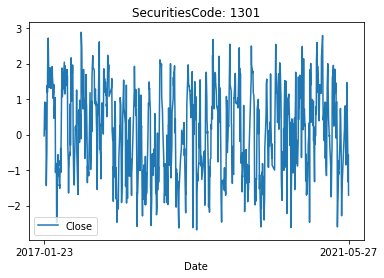

959


In [12]:
render_col(train_df, 1301, ['Close'])

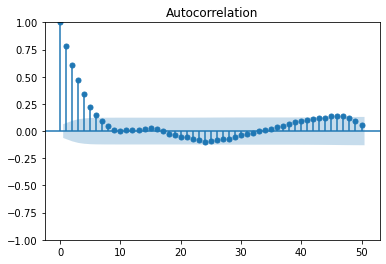

In [13]:
plot_acf(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

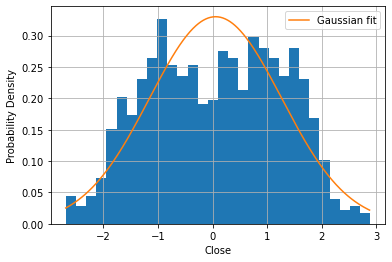

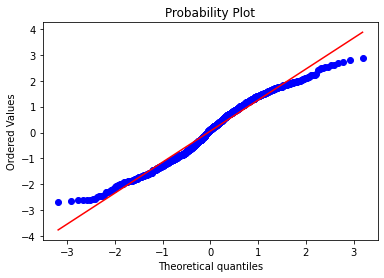

In [14]:
compare_gauss_dis(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [15]:
adfuller(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-10.81706969625188,
 1.8455981845306237e-19,
 0,
 958,
 {'1%': -3.4371943720994165,
  '5%': -2.8645616735407002,
  '10%': -2.568378906211183},
 2142.518055024918)

=> Stationary

CloseT1, CloseT2

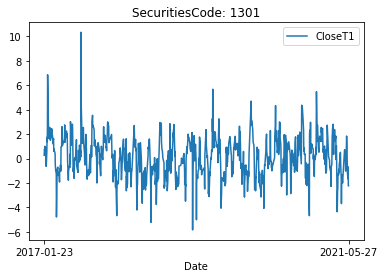

959


In [16]:
render_col(train_df, 1301, ['CloseT1'])

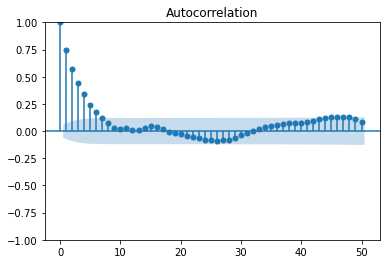

In [17]:
plot_acf(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

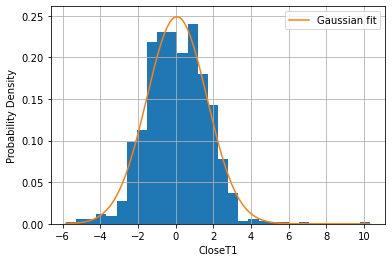

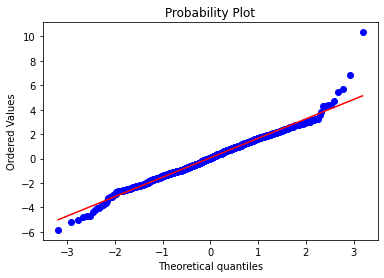

In [18]:
compare_gauss_dis(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [19]:
adfuller(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-11.698097637023688,
 1.5927507036488048e-21,
 0,
 958,
 {'1%': -3.4371943720994165,
  '5%': -2.8645616735407002,
  '10%': -2.568378906211183},
 2767.476018954499)

=> Stationary

Volume

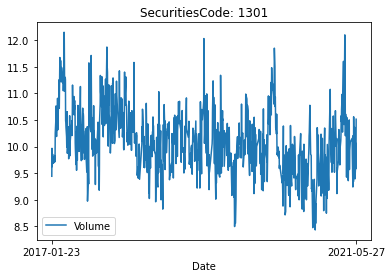

959


In [20]:
render_col(train_df, 1301, ['Volume'])

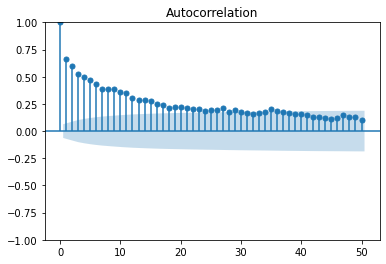

In [21]:
plot_acf(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [22]:
new_vol = train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True)

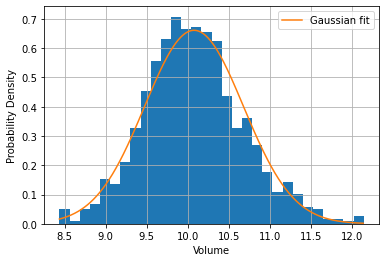

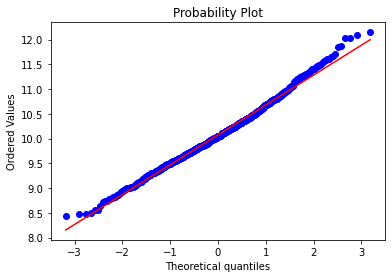

In [23]:
compare_gauss_dis(new_vol, bins = 30)

=> Stationary

Range_HL

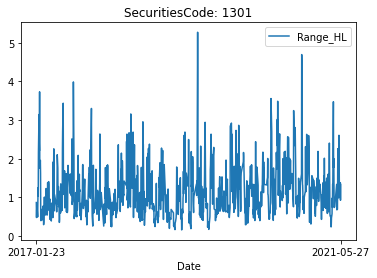

959


In [24]:
render_col(train_df, 1301, ['Range_HL'])

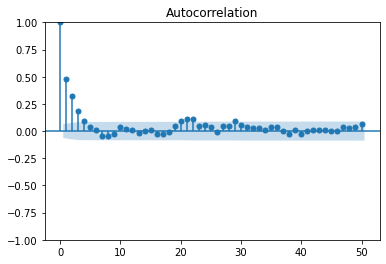

In [25]:
plot_acf(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

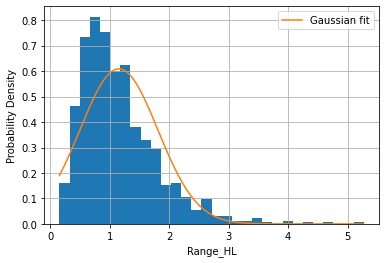

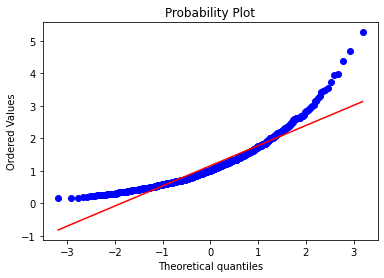

In [26]:
compare_gauss_dis(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [27]:
adfuller(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-13.952445390448931,
 4.6755325638757194e-26,
 1,
 957,
 {'1%': -3.4372015433243797,
  '5%': -2.8645648359053517,
  '10%': -2.568380590610461},
 1598.552811014119)

=> Stationary

Range_OC

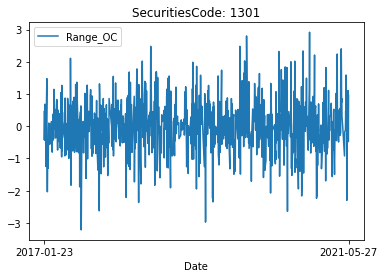

959


In [28]:
render_col(train_df, 1301, ['Range_OC'])

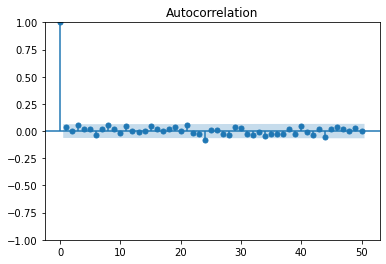

In [29]:
plot_acf(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

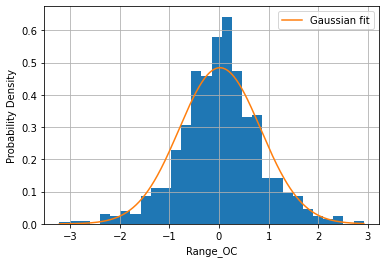

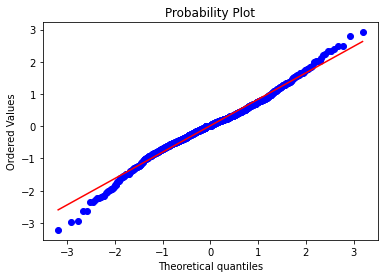

In [30]:
compare_gauss_dis(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [31]:
adfuller(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-29.79710222124055,
 0.0,
 0,
 958,
 {'1%': -3.4371943720994165,
  '5%': -2.8645616735407002,
  '10%': -2.568378906211183},
 2289.6609732959664)

=> Stationary

In [34]:
featureCols = train_df.columns
featureCols

Index(['Date', 'SecuritiesCode', 'ExpectedDividend', 'AdjustmentFactor',
       'SupervisionFlag', 'Volume', 'Close', 'Target', 'CloseT1', 'CloseT2',
       'Range_HL', 'Range_OC', 'dayofyear', 'dayofweek', 'week',
       'is_month_end', 'is_month_start', 'is_year_end', 'is_year_start',
       'Year', 'Month', 'Day', 'Close_lags_1', 'Range_HL_lags_1',
       'Range_OC_lags_1', 'Volume_lags_1', 'Close_lags_2', 'Range_HL_lags_2',
       'Range_OC_lags_2', 'Volume_lags_2', 'Close_lags_3', 'Range_HL_lags_3',
       'Range_OC_lags_3', 'Volume_lags_3', 'Close_lags_4', 'Range_HL_lags_4',
       'Range_OC_lags_4', 'Volume_lags_4', 'Close_lags_5', 'Range_HL_lags_5',
       'Range_OC_lags_5', 'Volume_lags_5', 'Close_lags_6', 'Range_HL_lags_6',
       'Range_OC_lags_6', 'Volume_lags_6', 'Close_lags_7', 'Range_HL_lags_7',
       'Range_OC_lags_7', 'Volume_lags_7', 'Close_lags_8', 'Range_HL_lags_8',
       'Range_OC_lags_8', 'Volume_lags_8', 'Close_lags_9', 'Range_HL_lags_9',
       'Range_OC_lags_

<AxesSubplot:>

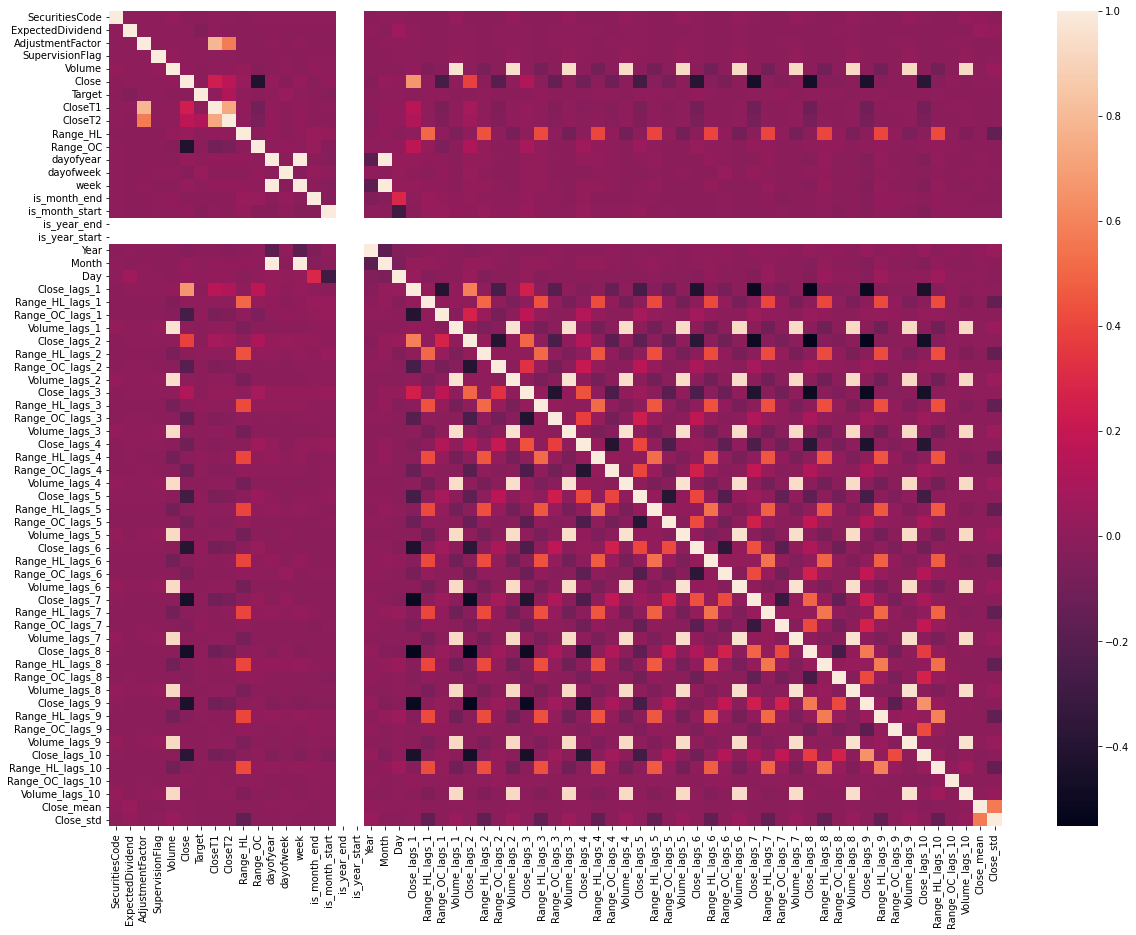

In [39]:
corr_matrix = train_df.sort_values(by=['SecuritiesCode', 'Date'])[list(featureCols)].corr()
plt.subplots(figsize=(20,15))
sb.heatmap(corr_matrix)

In [40]:
_r, _c = np.where(np.abs(corr_matrix) > 0.8)

couple_feat_found = np.array([
    featureCols[1:][_r[np.where(_r != _c)[0]]], 
    featureCols[1:][_c[np.where(_r != _c)[0]]]
]).T
couple_feat_found

array([['Volume', 'Volume_lags_1'],
       ['Volume', 'Volume_lags_2'],
       ['Volume', 'Volume_lags_3'],
       ['Volume', 'Volume_lags_4'],
       ['Volume', 'Volume_lags_5'],
       ['Volume', 'Volume_lags_6'],
       ['Volume', 'Volume_lags_7'],
       ['Volume', 'Volume_lags_8'],
       ['Volume', 'Volume_lags_9'],
       ['Volume', 'Volume_lags_10'],
       ['dayofyear', 'week'],
       ['dayofyear', 'Month'],
       ['week', 'dayofyear'],
       ['week', 'Month'],
       ['Month', 'dayofyear'],
       ['Month', 'week'],
       ['Volume_lags_1', 'Volume'],
       ['Volume_lags_1', 'Volume_lags_2'],
       ['Volume_lags_1', 'Volume_lags_3'],
       ['Volume_lags_1', 'Volume_lags_4'],
       ['Volume_lags_1', 'Volume_lags_5'],
       ['Volume_lags_1', 'Volume_lags_6'],
       ['Volume_lags_1', 'Volume_lags_7'],
       ['Volume_lags_1', 'Volume_lags_8'],
       ['Volume_lags_1', 'Volume_lags_9'],
       ['Volume_lags_1', 'Volume_lags_10'],
       ['Volume_lags_2', 'Volume'],
     